In [398]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [481]:
l = int(7e5)
t = np.linspace(0, 1e-1, l)

In [482]:
nu = 1.6e3
phi1 = 0
a1 = 10
phi2 = np.pi / 2
a2 = 1350e-3

In [483]:
V1 = a1*np.sin(nu*t/(2*np.pi) + phi1)
V2 = a2*np.sin(nu*t/(2*np.pi) + phi2)

In [484]:
f = V1
g = np.random.normal(loc=V2, scale=0.05)

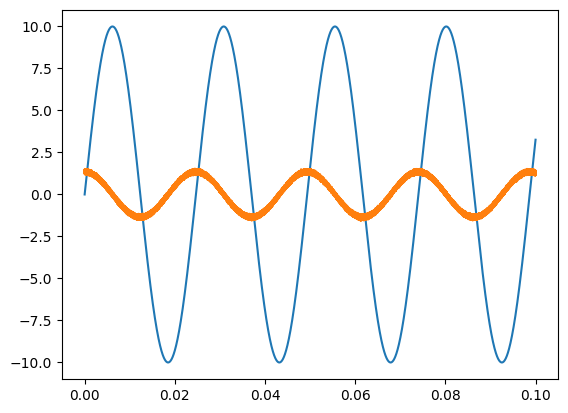

In [485]:
plt.plot(t, f)
plt.plot(t, g)
plt.show()

In [486]:
with open(r'sig1.csv', 'w') as file:
    string = 'voltage[V],time[ns]\n'
    for i in range(l):
        string += f'{f[i]:.10f},{t[i]*1e9:.4f}\n'
    file.write(string)

In [487]:
with open(r'sig2.csv', 'w') as file:
    string = 'voltage[V],time[ns]\n'
    for i in range(l):
        string += f'{g[i]:.10f},{t[i]*1e9:.4f}\n'
    file.write(string)

In [488]:
Ff = np.fft.fft(f)
Fg = np.fft.fft(g)
lamb = Fg / Ff
freq = np.fft.fftfreq(l, d=t[1])

lamb = np.append(lamb[(l // 2):], lamb[:(l // 2)])
freq = np.append(freq[(l // 2):], freq[:(l // 2)])

In [498]:
lim = 20
mid = l // 2
ll = mid - lim
rl = mid + lim

In [499]:
cur_freq = freq[ll:rl]
cur_lamb = lamb[ll:rl]

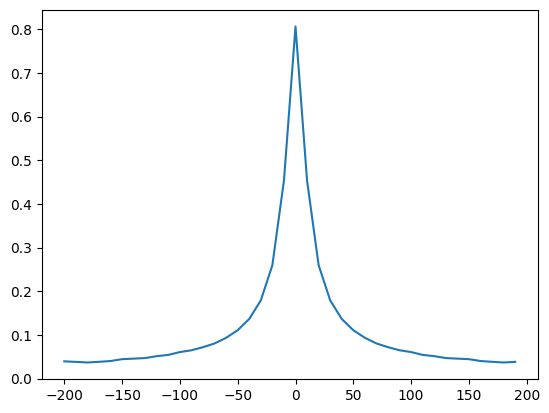

In [500]:
plt.plot(cur_freq, np.absolute(cur_lamb))

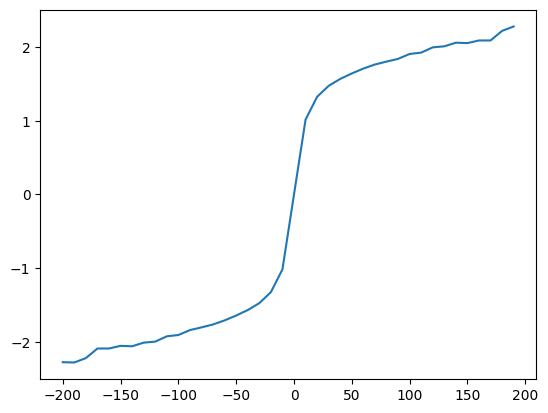

In [501]:
plt.plot(cur_freq, np.angle(cur_lamb))

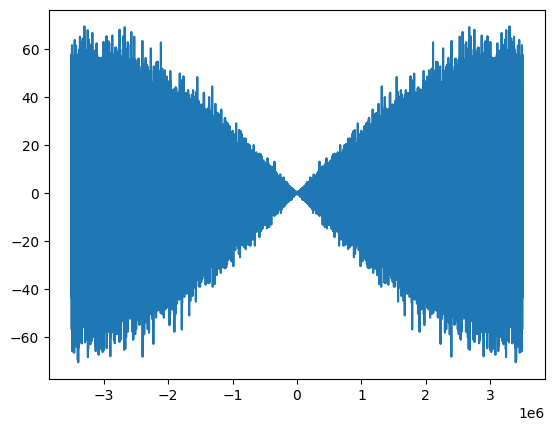

In [497]:
plt.plot(freq, lamb)

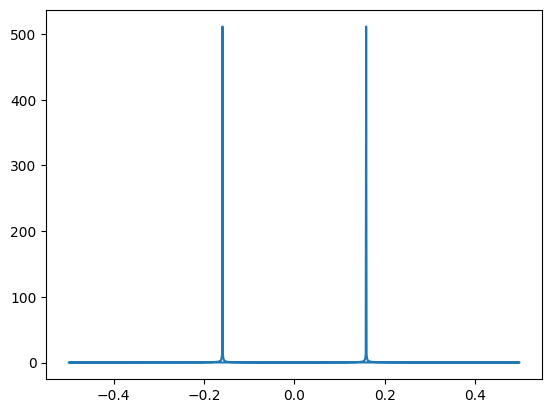

In [120]:
t = np.arange(1024)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, abs(sp))
plt.show()

In [122]:
omega = freq[abs(sp).argmax()]
omega * 2*np.pi

1.000155473701438

In [ ]:
df = pd.read